#### EN2550 Assignment 1 on Intensity Transformations and Neighborhood Filtering
##### Name : Vakeesan.K
##### Index N.O: 190643G
##### Github Link: https://github.com/vakeesanvk/image_processing_assignment01

##### 1)


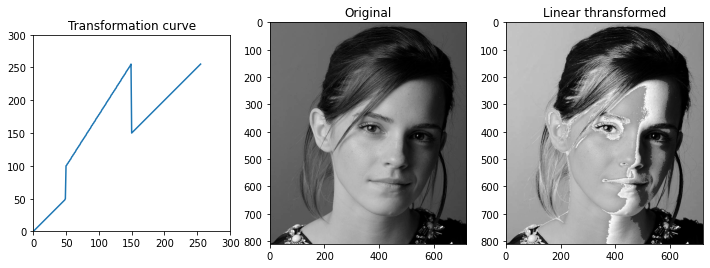

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img=cv.imread(r'C:\Python39\cv\assignment_01\emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

t1=np.linspace(0,50,50) ;t2=np.linspace(50,100,0);t3=np.linspace(100,255,100);t4=np.linspace(150,255,106)
t=np.concatenate((t1,t2,t3,t4),axis=0).astype(np.uint8)
fig,ax=plt.subplots(1,3,figsize=(12,6))

ax[0].plot(t);ax[0].set_aspect('equal');ax[0].set_xlim(0,300);ax[0].set_ylim(0,300);ax[0].set_title('Transformation curve')

assert len(t)== 256
g = cv.LUT(img,t)
ax[1].imshow(img,cmap='gray');ax[1].set_title('Original');ax[2].imshow(g,cmap='gray');ax[2].set_title('Linear thransformed')
plt.show()


##### *According to the results, the shape of the transformation curve should emphasize the dark part of the image(because it falls apart left side).*

##### 2)

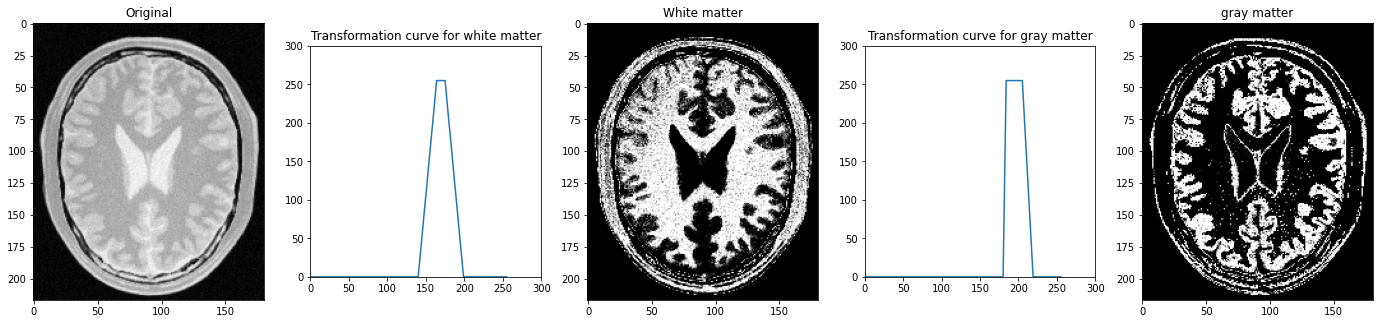

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img=cv.imread(r'C:\Python39\cv\assignment_01\brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None

t1=np.linspace(0,0,140); t2=np.linspace(0,255,25); t3=np.linspace(255,255,10); t4=np.linspace(255,0,25); t5=np.linspace(0,0,56)

t=np.concatenate((t1,t2,t3,t4,t5),axis=0).astype(np.uint8)
assert len(t)== 256
g = cv.LUT(img,t)

t1_=np.linspace(0,0,180); t2_=np.linspace(0,255,5); t3_=np.linspace(255,255,20); t4_=np.linspace(255,0,15); t5_=np.linspace(0,0,36)

t_=np.concatenate((t1_,t2_,t3_,t4_,t5_),axis=0).astype(np.uint8)

assert len(t_)== 256
h = cv.LUT(img,t_)

fig,ax=plt.subplots(1,5,figsize=(24,6))
ax[0].imshow(img,cmap='gray');ax[0].set_title('Original')

ax[1].plot(t); ax[1].set_aspect('equal'); ax[1].set_xlim(0,300); ax[1].set_ylim(0,300)
ax[1].set_title('Transformation curve for white matter')

ax[2].imshow(g,cmap='gray');ax[2].set_title('White matter')

ax[3].plot(t_); ax[3].set_aspect('equal'); ax[3].set_xlim(0,300); ax[3].set_ylim(0,300)
ax[3].set_title('Transformation curve for gray matter')

ax[4].imshow(h,cmap='gray'); ax[4].set_title('gray matter')
plt.show()

##### *I got the linear transformation grpahs by setting approximate graph using Adobe Photoshop software. output images looks noisy because of the width of the curves that i used. if i change that value large enough then i get an image which is highlighting other parts too. I've included that reference below.* 

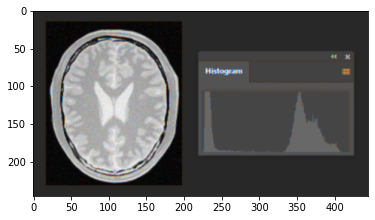

In [14]:
img=cv.imread(r'C:\Python39\cv\assignment_01\photoshop.png',cv.IMREAD_GRAYSCALE)
assert img is not None
plt.imshow(cv.cvtColor(img,cv.COLOR_BAYER_BG2RGB))
plt.show()

##### 3)


Gamma is 1.500000


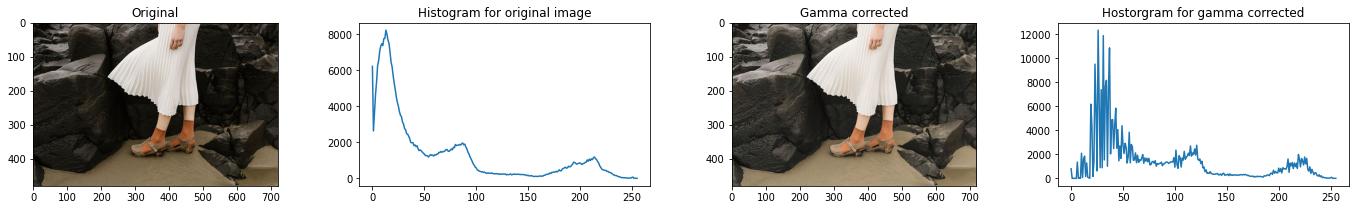

In [19]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread(r'C:\Python39\cv\assignment_01\highlights_and_shadows.jpg').astype(np.uint8)
assert img is not None

gamma = 1.5

lab_img=cv.cvtColor(img,cv.COLOR_BGR2Lab).astype(np.uint8)
(l,a,b)=cv.split(lab_img) #seperate the l*a*b spaces
t =np.array ([(p/255)**(1.0/gamma)*255 for p in range(0,256)]).astype(np.uint8)
l = cv.LUT(l,t)
lab_img=cv.merge([l,a,b]) #merge the l*a*b space

gamma_img = cv.cvtColor(lab_img.astype(np.uint8),cv.COLOR_Lab2BGR)

hist_i = cv.calcHist([img],[0],None,[256],[0,256])

hist_g = cv.calcHist([gamma_img],[0],None, [256],[0,256])

print("Gamma is %f"%gamma)
fig,ax=plt.subplots(1,4,figsize=(24,3))

ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)); ax[0].set_title('Original')
ax[1].plot(hist_i); ax[1].set_title('Histogram for original image')

ax[2].imshow(cv.cvtColor(gamma_img,cv.COLOR_BGR2RGB)); ax[2].set_title('Gamma corrected')
ax[3].plot(hist_g); ax[3].set_title('Hostorgram for gamma corrected')

plt.show()



##### *cv.split() function will separate the L,A and B channels then giving the gamma correction only at L space will not affect the colours in the image( Due to the feature of LAB space).*

##### 4)

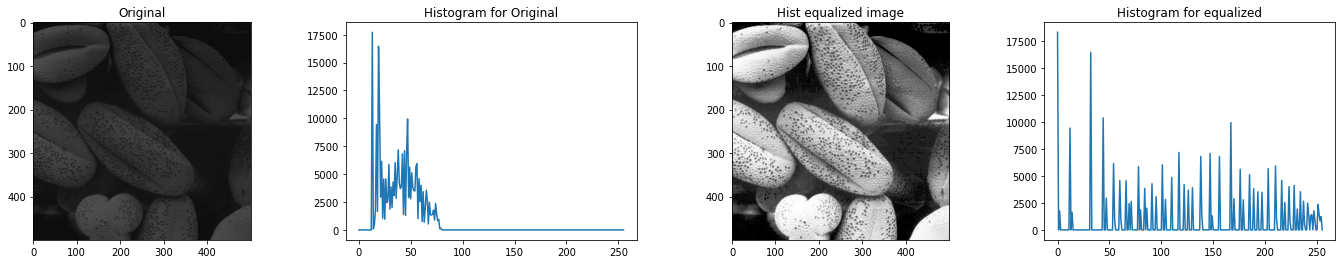

In [27]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f=cv.imread(r'C:\Python39\cv\exercices\lec 2\shells.tif', cv.IMREAD_GRAYSCALE)
assert f is not None

histogram_array = np.bincount(f.flatten(), minlength=256)

num_pixels = np.sum(histogram_array) #finding the total number of pixels
hist = histogram_array/num_pixels #find the average

cdf = np.cumsum(histogram_array) #cumulative sum 
cdf_msk=np.ma.masked_equal(cdf,0) #masked cdf array
cdf_msk= (cdf_msk - cdf_msk.min())*255/(cdf_msk.max() -cdf_msk.min()) #maping the value
cdf=np.ma.filled(cdf_msk,0).astype(np.uint8)
f2=cdf[f] #find the output pixel value

hist_f = cv.calcHist([f],[0],None,[256],[0,256])
hist_g = cv.calcHist([f2],[0],None, [256],[0,256])

fig, ax = plt.subplots(1,4, figsize=(24,4))
ax[0].imshow(cv.cvtColor(f,cv.COLOR_BGR2RGB)); ax[0].set_title('Original')
ax[1].plot(hist_f); ax[1].set_title('Histogram for Original')

ax[2].imshow(cv.cvtColor(f2,cv.COLOR_BGR2RGB)); ax[2].set_title('Hist equalized image')
ax[3].plot(hist_g); ax[3].set_title('Histogram for equalized')

plt.show()

##### *Rather than finding manual method for finding average and mapping them with image, i used masked array concept where all the operations will be applied on non masked elements*

##### 5)

SSD for Nearest Neighbor: 42358327
SSD for Bilinear Interpol: 41202223


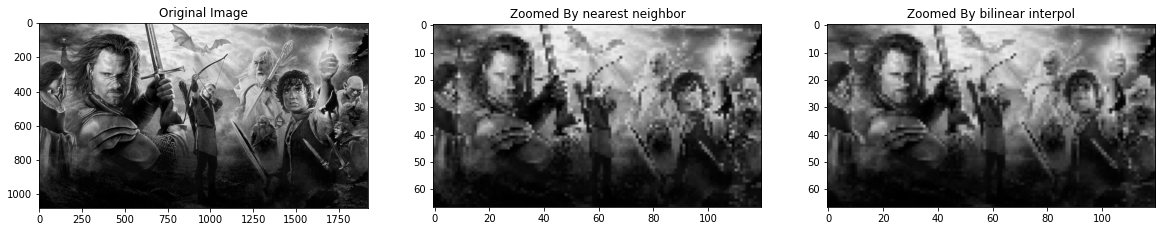

In [38]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_large= cv.imread(r'C:\Python39\cv\assignment_01\a1q5images\im01.png',cv.IMREAD_GRAYSCALE)
img_small=cv.imread(r'C:\Python39\cv\assignment_01\a1q5images\im01small.png',cv.IMREAD_GRAYSCALE)
assert img_large is not None 
assert img_small is not None 

s=4
scale=1/s
rows = int(scale*img_small.shape[0])
cols = int(scale*img_small.shape[1])
ne_img = np.zeros((rows,cols),dtype=img_small.dtype)
#nearast neighbor
for i in range(0,rows):
    for j in range (0,cols):
        ne_img[i,j]= img_small[int(i/scale),int(j/scale)]

#bilinear interpolation 
height = img_small.shape[0]
width = img_small.shape[1]

scale_x = (width)/(cols)
scale_y = (height)/(rows)

bi_img = np.zeros((rows, cols),dtype=img_small.dtype)

for i in range(rows):
    for j in range(cols):
        x = (j+0.5) * (scale_x) - 0.5
        y = (i+0.5) * (scale_y) - 0.5

        x_int = int(x)
        y_int = int(y)

        # Prevent crossing
        x_int = min(x_int, width-2)
        y_int = min(y_int, height-2)

        x_diff = x - x_int
        y_diff = y - y_int

        a = img_small[y_int, x_int]
        b = img_small[y_int, x_int+1]
        c = img_small[y_int+1, x_int]
        d = img_small[y_int+1, x_int+1]

        pixel = a*(1-x_diff)*(1-y_diff) + b*(x_diff) * \
            (1-y_diff) + c*(1-x_diff) * (y_diff) + d*x_diff*y_diff

        bi_img[i, j] = pixel.astype(np.uint8)  

#calculating SSD
ssd1 = 0
ssd2=0
for i in range(0,rows):
    for j in range (0,cols):
        diff1 = int(img_large[i][j]) - int(ne_img[i][j])
        diff2 = int(img_large[i][j]) - int(bi_img[i][j])
        ssd1 += diff1 * diff1
        ssd2 +=diff2 *diff2
print("SSD for Nearest Neighbor: %i"%ssd1)
print("SSD for Bilinear Interpol: %i"%ssd2)
fig, ax = plt.subplots(1,3,figsize=(20,6))
ax[0].imshow(cv.cvtColor(img_large,cv.COLOR_BGR2RGB)); ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(ne_img,cv.COLOR_BGR2RGB)); ax[1].set_title("Zoomed By nearest neighbor")
ax[2].imshow(cv.cvtColor(bi_img,cv.COLOR_BGR2RGB)); ax[2].set_title("Zoomed By bilinear interpol")
plt.show()

##### *According to the SSD value, Bilinear interpolation could be best alternative for nearest neighbor zooming. Further more, When scaling factor is increasing, output image can't be in an expected image quality.*

##### 6)

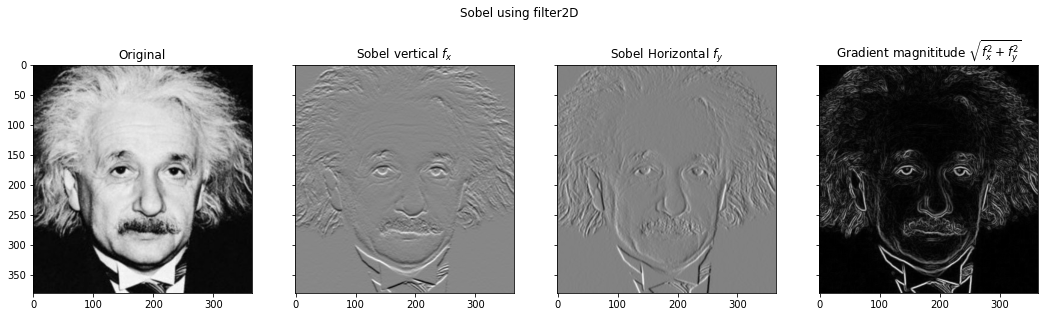

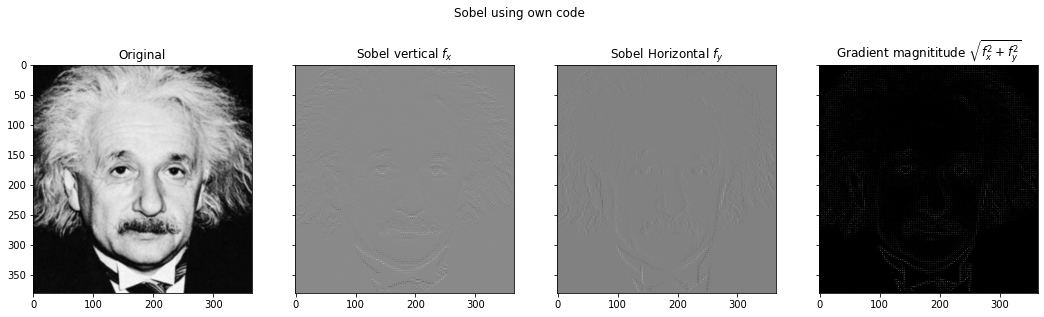

In [50]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(r'C:\Python39\cv\assignment_01\einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

#sobel vertical
kernel_v=np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype=np.float32)
imgv = cv.filter2D(img,-1,kernel_v)

#sobel horizontal
kernel_h=np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype=np.float32)
imgh = cv.filter2D(img,-1,kernel_h)

grad_mag = np.sqrt(imgv**2+imgh**2)

fig1,ax = plt.subplots(1,4,sharex='all', sharey='all',figsize=(18,5))
fig1.suptitle("Sobel using filter2D")
ax[0].imshow(img,cmap='gray'); ax[0].set_title('Original')
ax[1].imshow(imgv,cmap='gray'); ax[1].set_title('Sobel vertical $f_x$')
ax[2].imshow(imgh,cmap='gray'); ax[2].set_title('Sobel Horizontal $f_y$')
ax[3].imshow(grad_mag,cmap='gray'); ax[3].set_title('Gradient magnititude $\sqrt{f_x^2 + f_y^2}$')

#sobel verical & horizontal manual method
height, width = img.shape
man_imgv=np.ones(( height,width))
man_imgh=np.ones((height,width))
for i in range(0,width-2,3):
    for j in range(0,height-2,3):
        man_imgv[j][i] = np.sum(np.multiply(img[j:j+3,i:i+3],kernel_v))
        man_imgh[j][i] = np.sum(np.multiply(img[j:j+3,i:i+3],kernel_h))
man_grad_mag = np.sqrt(man_imgv**2+man_imgh**2)

fig2,ax_ = plt.subplots(1,4,sharex='all', sharey='all',figsize=(18,5))
fig2.suptitle("Sobel using own code")
ax_[0].imshow(img,cmap='gray'); ax_[0].set_title('Original')
ax_[1].imshow(man_imgv,cmap='gray'); ax_[1].set_title('Sobel vertical $f_x$')
ax_[2].imshow(man_imgh,cmap='gray'); ax_[2].set_title('Sobel Horizontal $f_y$')
ax_[3].imshow(man_grad_mag,cmap='gray'); ax_[3].set_title('Gradient magnititude $\sqrt{f_x^2 + f_y^2}$')

plt.show()

##### *Here i used simple vector  multiplication as first step for convolution and then i get the sum of that into a new image vectors(e.g. man_imgv). i don't sharpen the final image at all. that's why it looks faded.* 

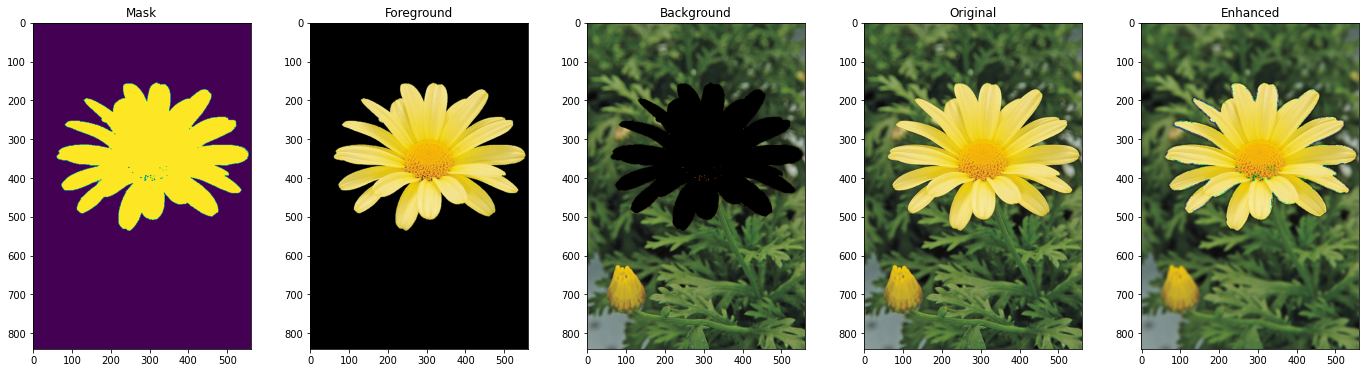

In [45]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(r'C:\Python39\cv\assignment_01\daisy.jpg')

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,0,800,550)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

fg_img = img*mask2[:,:,np.newaxis]
bg_img=img-fg_img
blur_bg=cv.GaussianBlur(bg_img,(9,9),cv.BORDER_DEFAULT)
fin_img=blur_bg+fg_img

fig, ax=plt.subplots(1,5,figsize=(24,6))
ax[0].imshow(mask2); ax[0].set_title("Mask")
ax[1].imshow(cv.cvtColor(fg_img,cv.COLOR_BGR2RGB)); ax[1].set_title("Foreground")
ax[2].imshow(cv.cvtColor(bg_img,cv.COLOR_BGR2RGB)); ax[2].set_title("Background")

ax[3].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)); ax[3].set_title("Original")
ax[4].imshow(cv.cvtColor(fin_img,cv.COLOR_BGR2RGB)); ax[4].set_title("Enhanced")

plt.show()

##### *Mask2 is used to filter out all the zero values between the foreground pixels and background pixels. It will leave the one values at the sepeartion line between foreground and background.Moreover, Smoothing effect for background + adding foreground image = will make the edge dark.*